<a href="https://colab.research.google.com/github/VinhDevNguyen/Project_Alpha/blob/Data_Analyze/BookingChallenge_DataAnalyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download dataset

In [1]:
!wget -O dataset.zip https://035105f7-ae32-47b6-a25b-87af7924c7ea.usrfiles.com/archives/3091be_45e4070aadf74d92b517e83dd1b9e195.zip?dn=bkngWSDM2021+%281%29.zip

--2020-12-30 12:47:41--  https://035105f7-ae32-47b6-a25b-87af7924c7ea.usrfiles.com/archives/3091be_45e4070aadf74d92b517e83dd1b9e195.zip?dn=bkngWSDM2021+%281%29.zip
Resolving 035105f7-ae32-47b6-a25b-87af7924c7ea.usrfiles.com (035105f7-ae32-47b6-a25b-87af7924c7ea.usrfiles.com)... 34.102.176.152
Connecting to 035105f7-ae32-47b6-a25b-87af7924c7ea.usrfiles.com (035105f7-ae32-47b6-a25b-87af7924c7ea.usrfiles.com)|34.102.176.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16702946 (16M) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>]  15.93M  32.4MB/s    in 0.5s    

2020-12-30 12:47:42 (32.4 MB/s) - ‘dataset.zip’ saved [16702946/16702946]



In [2]:
!unzip ./dataset.zip

Archive:  ./dataset.zip
  inflating: booking_train_set.csv   
  inflating: __MACOSX/._booking_train_set.csv  
  inflating: evaluation_sample.ipynb  
  inflating: Readme.md               
  inflating: __MACOSX/._Readme.md    
  inflating: sample_test_set.csv     
  inflating: __MACOSX/._sample_test_set.csv  
  inflating: sample_truth.csv        
  inflating: __MACOSX/._sample_truth.csv  
  inflating: submission.csv          


 ## Import packages and read csv file

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('./booking_train_set.csv', usecols = [i for i in range(1, 10)])

 ## Analyze data
 ### 1. About the dataset

In [5]:
df.head()

,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id
0,1006220,2016-04-09,2016-04-11,31114,desktop,384,Gondal,Gondal,1006220_1
1,1006220,2016-04-11,2016-04-12,39641,desktop,384,Gondal,Gondal,1006220_1
2,1006220,2016-04-12,2016-04-16,20232,desktop,384,Gondal,Glubbdubdrib,1006220_1
3,1006220,2016-04-16,2016-04-17,24144,desktop,384,Gondal,Gondal,1006220_1
4,1010293,2016-07-09,2016-07-10,5325,mobile,359,The Devilfire Empire,Cobra Island,1010293_1


 ### 2. Size of dataset

In [6]:
len(df)

1166835

 ### 3. Unique values

In [7]:
feature = ["user_id", "city_id", "affiliate_id", "booker_country", "hotel_country", "utrip_id"]
for i in range(len(feature)):
    len_feature = len(df[feature[i]].unique())
    print(f"There are {len_feature} {feature[i]}")

There are 200153 user_id
There are 39901 city_id
There are 3254 affiliate_id
There are 5 booker_country
There are 195 hotel_country
There are 217686 utrip_id


In [8]:
trip_count = df["utrip_id"].value_counts()
trip_count

3635431_3     48
2209265_10    45
433188_8      44
5231140_3     41
2209265_15    41
              ..
4571597_2      1
957813_1       1
501034_1       1
3998286_1      1
203582_1       1
Name: utrip_id, Length: 217686, dtype: int64

 Find out the max trip

In [9]:
max_trip = df.index[df['utrip_id'] == trip_count.index[0]].tolist()
df[max_trip[0]:max_trip[-1]]

,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id
49642,3635431,2016-04-01,2016-04-02,47319,mobile,9924,Gondal,Gondal,3635431_3
49643,3635431,2016-04-02,2016-04-03,36063,mobile,9924,Gondal,Gondal,3635431_3
49644,3635431,2016-04-03,2016-04-04,36063,mobile,384,Gondal,Gondal,3635431_3
49645,3635431,2016-04-04,2016-04-05,36063,mobile,9924,Gondal,Gondal,3635431_3
49646,3635431,2016-04-05,2016-04-06,3109,mobile,9924,Gondal,Gondal,3635431_3
49647,3635431,2016-04-06,2016-04-07,3109,mobile,9924,Gondal,Gondal,3635431_3
49648,3635431,2016-04-07,2016-04-08,3109,mobile,9924,Gondal,Gondal,3635431_3
49649,3635431,2016-04-08,2016-04-09,3109,mobile,9924,Gondal,Gondal,3635431_3
49650,3635431,2016-04-09,2016-04-10,3109,mobile,9924,Gondal,Gondal,3635431_3
49651,3635431,2016-04-10,2016-04-11,3109,mobile,9924,Gondal,Gondal,3635431_3


### 4. Plot histogram
Plot the histogram to find out the distribution of how many times customers mostly book?

In [10]:
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
import numpy as np

hist, edges = np.histogram(trip_count, bins=48)
# Create the blank plot
p = figure(plot_height = 600, plot_width = 600, 
           title = 'Histogram of Area',
          x_axis_label = 'Area', 
           y_axis_label = 'Count')

# Add a quad glyph
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white")

# Show the plot
output_notebook()
show(p)

Custumer mostly book 4 hotel per trip

### 5. Ranked which months customers travel the most?


In [11]:
Month_Checkin = []
for i in range(len(df)):
  Month_Checkin.append(int(df['checkin'][i][5:7])) # Month only

In [16]:
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
import numpy as np

hist, edges = np.histogram(Month_Checkin, bins=12)
# Create the blank plot
p = figure(plot_height = 600, plot_width = 600, 
           title = 'Histogram of Area',
          x_axis_label = 'Month', 
           y_axis_label = 'Count')

# Add a quad glyph
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white")

# Show the plot
output_notebook()
show(p)

### 6. List of cities travels the most

In [13]:
city_count = df["city_id"].value_counts()
city_count[0:15]

47499    11242
23921    10511
36063     9559
17013     9011
29319     8179
64876     7784
55128     7763
17127     6893
2416      6641
66648     6625
60222     6278
51259     6093
29770     6088
26235     5818
48483     5731
Name: city_id, dtype: int64

### 7. Which country travels the most?

In [14]:
country_count = df["hotel_country"].value_counts()
country_count[0:15]

Cobra Island              137791
Fook Island               117717
Gondal                    104979
Glubbdubdrib               74840
Elbonia                    53965
Borginia                   45629
Kangan                     44876
Bozatta                    40599
Alvonia                    34446
Holy Britannian Empire     30040
Axphain                    28719
Santa Prisca               27546
Patusan                    26088
Rolisica                   22338
Kasnia                     21588
Name: hotel_country, dtype: int64

### 8. Which country the traveler from

In [15]:
booker_country_count = df["booker_country"].value_counts()
booker_country_count

Gondal                  536036
The Devilfire Empire    286244
Elbonia                 235344
Tcherkistan              80573
Bartovia                 28638
Name: booker_country, dtype: int64

### 9.Plot median number of ``city_id`` per ``utrip_id`` 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


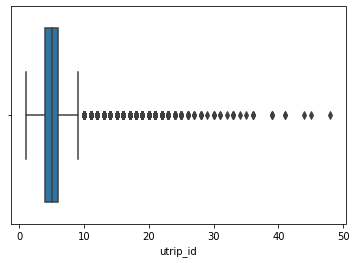

In [23]:
import seaborn as sns 
from matplotlib import pyplot as plt 

trip_count = df["utrip_id"].value_counts()
sns.boxplot(trip_count)
plt.show()


In [24]:
# Longest utrip count
trip_count.max()

48

## Recommend hyperparameter

With the plot above I highly recommend using RNN with number of cells around 10 